In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('ticks')
five_thirty_eight = ["#30a2da", "#fc4f30", "#e5ae38", "#6d904f", "#8b8b8b",]
sns.set_palette(five_thirty_eight)

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np 
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [2]:
treatment_df = pd.read_csv("TreatmentSample01.csv", parse_dates=['TreatmentDate'])
diagnosis_df = pd.read_csv("DiagnosisSample01.csv", parse_dates=['DiagnosisDate'])

In [3]:
print(treatment_df.shape, diagnosis_df.shape)

(714, 3) (44, 5)


In [4]:
diagnosis_df.head()

,PatientID,DiagnosisDate,DiagnosisCode,Diagnosis,IsCancerDiagnosis
0,2634,2011-02-19,285.8,Anemia,False
1,5657,2012-06-07,285.8,Anemia,False
2,7937,2013-01-06,285.8,Anemia,False
3,8615,2013-07-18,284.9,Anemia,False
4,4354,2012-02-04,284.9,Anemia,False


In [5]:
treatment_df.head()

,PatientID,TreatmentDate,DrugCode
0,2038,2010-01-24,A
1,2038,2010-01-27,A
2,2038,2010-01-30,A
3,2038,2010-02-02,A
4,2038,2010-02-06,A


## Question 1: First, the clinic would like to know for which diseases they are seeing patients.

### 1a) Which types of cancer does the clinic see patients for?

### 1b) How many patients does the clinic see for each cancer type?

In [6]:
diagnosis_df.Diagnosis.value_counts()

Breast Cancer    22
Colon Cancer     11
Anemia            7
Hypertension      3
Hypertension      1
Name: Diagnosis, dtype: int64

### Since, we are only concerned with cancer patients, let us drop all non-cancer entries from our dataframe.

In [7]:
cancer_diagnosis_df = diagnosis_df[diagnosis_df.IsCancerDiagnosis == True]
cancer_diagnosis_df = cancer_diagnosis_df.drop('IsCancerDiagnosis', axis = 1)
display(cancer_diagnosis_df.head())

,PatientID,DiagnosisDate,DiagnosisCode,Diagnosis
7,2038,2010-01-21,174.9,Breast Cancer
8,2120,2010-01-09,174.1,Breast Cancer
9,2407,2010-06-13,174.9,Breast Cancer
10,2425,2010-12-15,174.9,Breast Cancer
11,2462,2011-01-07,174.9,Breast Cancer


In [8]:
len(cancer_diagnosis_df.PatientID.unique())

27

### We have 27 cancer patients in our dataset, but 33 diagnoses. Therefore, some patients must have more than one diagnosis

In [9]:
cancer_diagnosis_df.PatientID.value_counts().sort_values(ascending = False)[:6]

4374    3
3449    2
3757    2
6877    2
3095    2
4692    1
Name: PatientID, dtype: int64

### As we can see, there are patients with multiple diagnoses, this can mean either of two things -

### 1. The patient has been diagnosed with more than one type of cancer

### 2. The patient has been diagnosed multiple times with the same type of cancer.

### We can resolve this by filtering duplicate entries based on two columns - PatientID and Diagnosis.
### This will enable us to accurately visualize number of patients diagnosed with colon cancer and number of patients diagnosed with breast cancer.

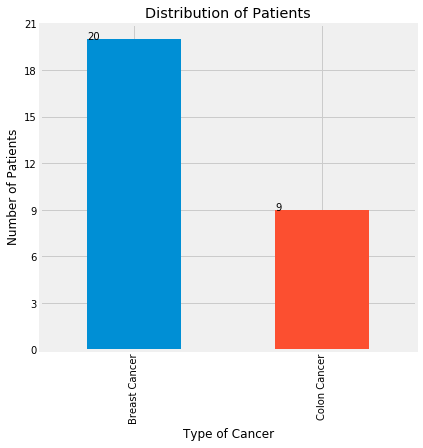

In [10]:
from matplotlib.ticker import MaxNLocator

ax = cancer_diagnosis_df.drop_duplicates(['PatientID','Diagnosis'], keep = 'first').Diagnosis.value_counts().plot(kind = "bar", figsize = (6,6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
    
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Distribution of Patients")
plt.ylabel('Number of Patients')
plt.xlabel('Type of Cancer')
plt.show()

### This plot reveals that, there are 2 people who have been diagnosed with both breast and colon cancer.

In [11]:
temp = cancer_diagnosis_df.drop_duplicates(['PatientID','Diagnosis'], keep = 'first')
temp[temp.duplicated('PatientID', keep = False)]

,PatientID,DiagnosisDate,DiagnosisCode,Diagnosis
13,3757,2011-10-11,174.1,Breast Cancer
27,6877,2012-12-09,174.3,Breast Cancer
34,6877,2012-11-16,153.4,Colon Cancer
39,3757,2011-10-08,153.5,Colon Cancer


### Unfortunately, we were right, patients with ID 3757 and 6877 have been diagnosed with both kinds of cancer.

### Question 2: The clinic wants to know how long it takes for patients to start therapy after being diagnosed, which they consider to be helpful in understanding the quality of care for the patients.  

### 2a) How long after being diagnosed do cancer patients start treatment for each cancer type?

### 2b) Are there any patients which are diagnosed but not treated at the practice?

### We will create a set of all patients diagnosed with cancer, we will also create a set of all people who have undergone treatment. If the intersection of these sets is complete, then all patients who have been diagnosed have also been treated.

In [12]:
diagnosed_set = set(cancer_diagnosis_df.PatientID.sort_values().unique())
print("Patients diagnosed with Cancer: \n", diagnosis_df[diagnosis_df.IsCancerDiagnosis == True].PatientID.sort_values().unique())

Patients diagnosed with Cancer: 
 [2038 2120 2407 2425 2462 2763 2770 3095 3449 3757 3948 4256 4354 4374
 4692 5259 6281 6321 6837 6877 6889 6922 7230 7242 7796 7976 9331]


In [13]:
treated_set = set(treatment_df.PatientID.sort_values().unique())
print("Patients being treated for Cancer: \n", treatment_df.PatientID.sort_values().unique())

Patients being treated for Cancer: 
 [2038 2120 2407 2425 2462 2763 2770 3095 3449 3757 3948 4256 4354 4374
 4692 5259 6281 6321 6837 6877 6889 6922 7230 7242 7796 7976 9331]


In [14]:
print("Number of Patients in diagnosed set:", len(diagnosed_set), "Number of Patients in treatment set:", len(treated_set))
print("Intersection of Patients in diagnosed set and treatment set:", len(treated_set.intersection(diagnosed_set)))

Number of Patients in diagnosed set: 27 Number of Patients in treatment set: 27
Intersection of Patients in diagnosed set and treatment set: 27


### Thus, we can see that all the patients diagnosed with cancer were treated at the practice.

In [15]:
cancer_diagnosis_df = cancer_diagnosis_df.sort_values(by='DiagnosisDate', ascending=True)
treatment_df = treatment_df.sort_values(by='TreatmentDate', ascending=True)

In [16]:
treatment_diagnosis = pd.merge(left=cancer_diagnosis_df.drop_duplicates('PatientID', keep = 'first'), 
                               right=treatment_df.drop_duplicates('PatientID', keep = 'first'), 
                               on=['PatientID'], how='left' )

In [17]:
treatment_diagnosis['TreatmentDelay'] = treatment_diagnosis.TreatmentDate - treatment_diagnosis.DiagnosisDate

In [18]:
boxprops = dict(linestyle='--', linewidth=3)
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5)

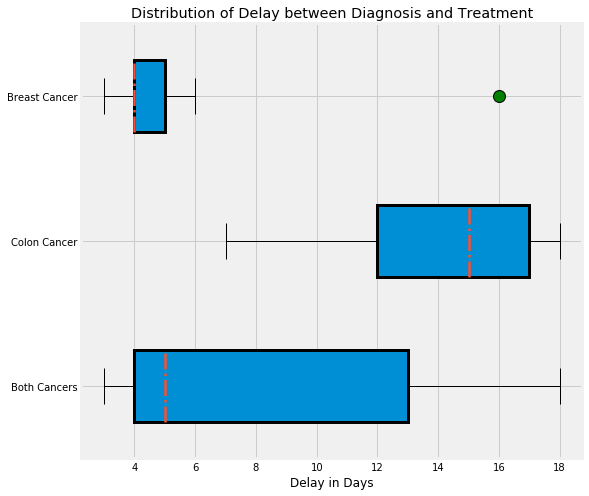

In [19]:
treatment_diagnosis['TreatmentDelayInt'] = treatment_diagnosis.TreatmentDelay.astype('timedelta64[D]').astype('int')
plt.figure(figsize=(8,8))
plt.boxplot([treatment_diagnosis.TreatmentDelayInt, treatment_diagnosis[treatment_diagnosis.Diagnosis == "Colon Cancer"].TreatmentDelayInt,
            treatment_diagnosis[treatment_diagnosis.Diagnosis == "Breast Cancer"].TreatmentDelayInt], vert = False, widths=0.5, 
            boxprops = boxprops, medianprops = medianprops, flierprops = flierprops, patch_artist=True)
plt.yticks([1, 2, 3], ['Both Cancers', 'Colon Cancer', 'Breast Cancer'])
plt.xlabel('Delay in Days')
plt.title("Distribution of Delay between Diagnosis and Treatment")
plt.show()

**We can conclude the following things from the above plot:**

**1. 50% of breast cancer patients seek treatment within 4 days of diagnosis, and all breast cancer patients seek treatment within 6 days of diagnosis.**

**2. Colon cancer patients take a relative longer time to begin treatment, 50% wait upto 15 days before beginning treatment, with minimum delay at 7 days and maximum delay at 18 days.**


**Question 3: After being treated with a first line of treatment (a drug or combination of drugs), what proportion of all cancer patients go on to be treated with a second line of treatment? (For more information on the concept ** **of "first-line therapy", please reference https://www.cancer.net/navigating-cancer-care/how-cancer-treated/when-first-treatment-doesnt-work)**

 

**So basically first line of treatment is a treatment plan that is most likely to have the greatest benefits and the fewest risks or side effects.**

**First line of treatment can involve a single drug i.e. monotherapy or multiple drugs i.e. polytherapy.**

**If the first line of treatment is unsuccessful, a second-line treatment, also called second-line therapy is suggested by the doctors. It is a different treatment that is likely to be effective.**

**Let us see, if we can visualize the treatments for each patient as a time series.**


**First, we add a diagnosis column to to our treatment dataframe, so we know what the patient is being treated for.**

In [20]:
treatment_df = pd.merge(treatment_df, treatment_diagnosis[['Diagnosis', 'PatientID']], on = 'PatientID')

In [21]:
treatment_df.head()

,PatientID,TreatmentDate,DrugCode,Diagnosis
0,2038,2010-01-24,A,Breast Cancer
1,2038,2010-01-27,A,Breast Cancer
2,2038,2010-01-30,A,Breast Cancer
3,2038,2010-02-02,A,Breast Cancer
4,2038,2010-02-06,A,Breast Cancer


#### Let us see, if we can visualize the treatment pattern for all the patients

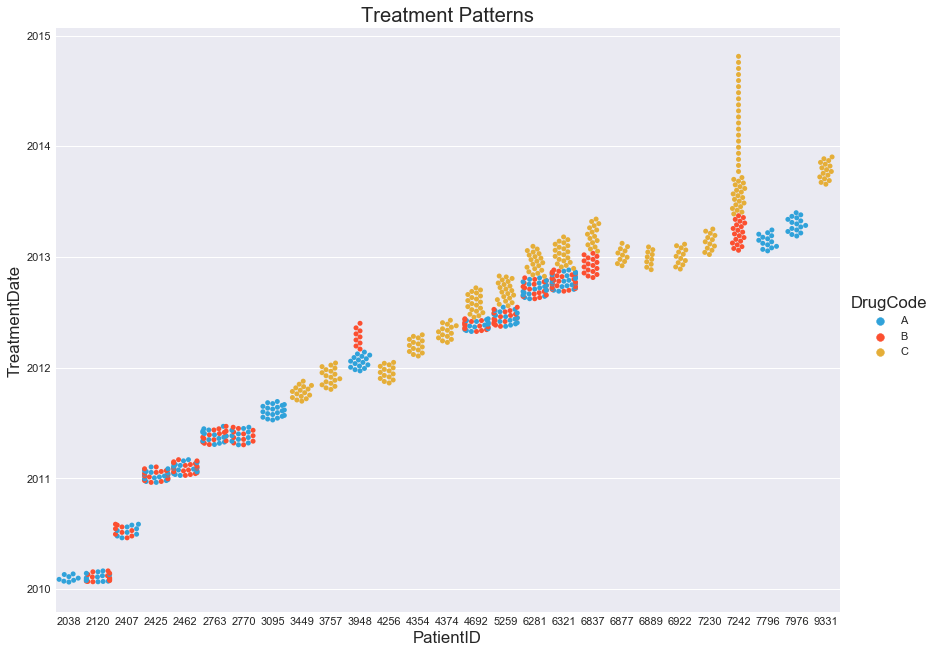

In [72]:
#fig, ax = plt.subplots()
# the size of A4 paper
#fig.set_size_inches(12, 12)
sns.catplot(x="PatientID", y="TreatmentDate", hue="DrugCode", kind="swarm", 
            data=treatment_df, height=9, aspect=12/9);
plt.title('Treatment Patterns');

**The above visualization shows that there are patients in our data set who underwent monothrerapy, i.e. they were administered a single drug for the entire course of treatement at the clinic**

**Let us see if we can isolate these patients**

In [22]:
temp = treatment_df.drop_duplicates(['PatientID', 'DrugCode'])
temp = temp.drop_duplicates(['PatientID'], keep = False)
monotherapy = temp.PatientID.tolist()
print("Patients who underwent monotherapy\n", monotherapy)

Patients who underwent monotherapy
 [2038, 3095, 3449, 3757, 4256, 4354, 4374, 6889, 6922, 6877, 7230, 7796, 7976, 9331]


#### Let us try and visualize the treatment course for these patients

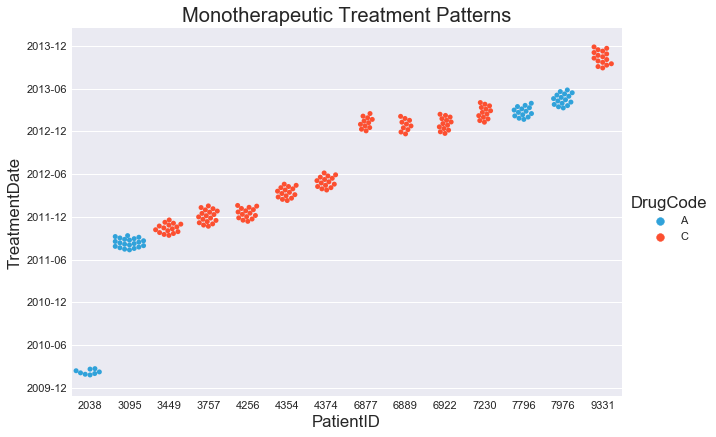

In [73]:
sns.set_style('darkgrid')
sns.catplot(x="PatientID", y="TreatmentDate", hue="DrugCode", kind="swarm", 
            data=treatment_df[( treatment_df.PatientID.isin(monotherapy))], height=6, aspect=9/6);
plt.title('Monotherapeutic Treatment Patterns');

**As we can see from the above plot, 14 patients were administered a single drug- either A or C throughout the course of their treatment at the clinic**

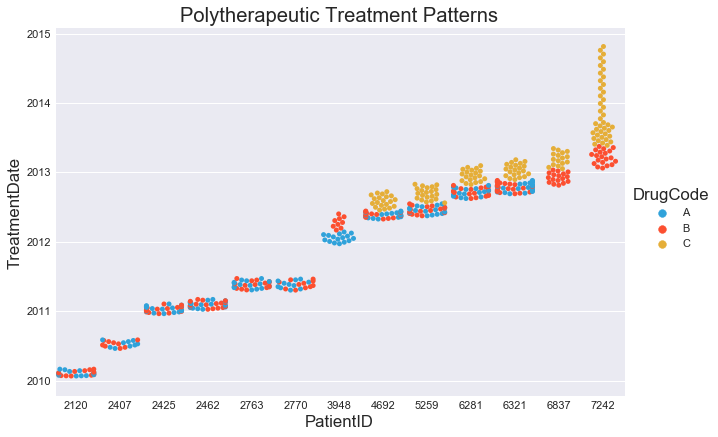

In [74]:
sns.catplot(x="PatientID", y="TreatmentDate", hue="DrugCode", kind="swarm", 
            data=treatment_df[(~treatment_df.PatientID.isin(monotherapy))], height=6, aspect=9/6);
plt.title('Polytherapeutic Treatment Patterns');

#### From the above plot following conclusions can be drawn:
##### We see that all patients treated before 2012, did not transition to the second line of treatment. But, all patients after 2012, transitioned to a second line of treatment. 
##### Drug C was mostly used for the second line of treatment.
##### 7 patients transitioned from first line of treatment to second line of treatment.